In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv',parse_dates=True, index_col='DATE')

In [3]:
df.head(10)

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
1972-06-01,100.5960
1972-07-01,100.1263
1972-08-01,96.3607
1972-09-01,85.8007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [5]:
df.describe()

,IPN31152N
count,573.000000
mean,109.895545
std,27.950571
min,58.659800
25%,88.935500
50%,107.643000
75%,128.277700
max,196.173700


<AxesSubplot:xlabel='DATE'>

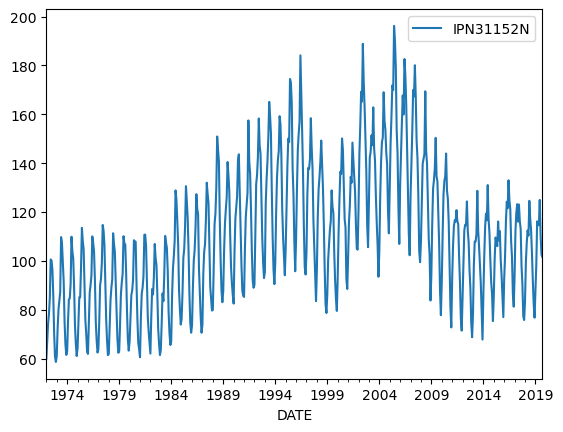

In [6]:
df.plot()

In [7]:
test_size = 18
test_index = len(df) - test_size

In [8]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [9]:
scaler = MinMaxScaler()

In [10]:
scaled_train = scaler.fit_transform(train)

In [11]:
scaled_test = scaler.transform(test)

In [12]:
length = 12
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [38]:
model=None

In [39]:
model = Sequential([
    Input((length, n_features)),
    LSTM(130, activation='relu'),
    Dense(1)
])

In [40]:
model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 130)                 │          68,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             131 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,771 (268.64 KB)

 Trainable params: 68,771 (268.64 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [44]:
model.fit(generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0338 - val_loss: 0.0035
Epoch 2/30
 16/543 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0068 

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0082 - val_loss: 0.0030
Epoch 3/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 4/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 5/30
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0046 - val_loss: 0.0018


<AxesSubplot:>

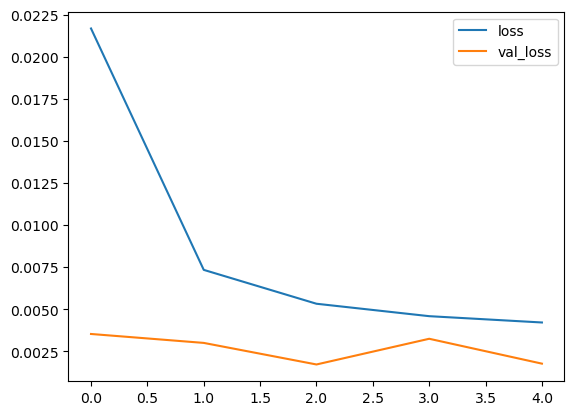

In [45]:
pd.DataFrame(model.history.history).plot()

In [46]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [47]:
test_predictions = scaler.inverse_transform(test_predictions)

In [48]:
test['Predictions'] = test_predictions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9624\86846539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = test_predictions


In [49]:
test.head()

,IPN31152N,Predictions
DATE,,
2018-04-01,112.4309,117.207374
2018-05-01,110.3544,121.233536
2018-06-01,124.5841,123.168410
2018-07-01,117.2215,119.886459
2018-08-01,112.6779,112.155875


<AxesSubplot:xlabel='DATE'>

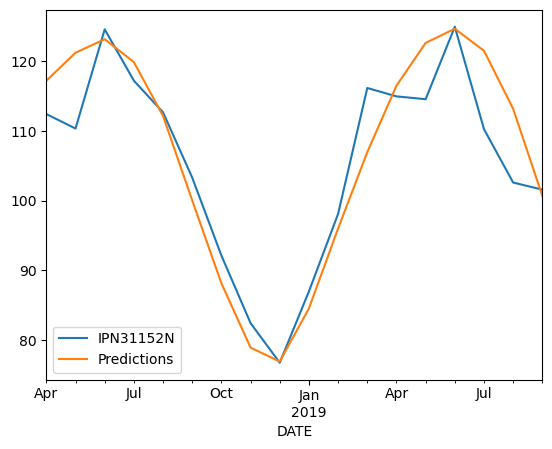

In [50]:
test.plot()

In [55]:
np.sqrt(mean_squared_error(test['IPN31152N'], test['Predictions']))

5.729688852763561

In [56]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [57]:
length = 12
generator = TimeseriesGenerator(data, data, length=length, batch_size=1)

In [58]:
model = None 

In [59]:
model = Sequential([
    Input((length, n_features)),
    LSTM(130, activation='relu'),
    Dense(1)
])

In [60]:
model.compile(optimizer='adam', loss='mse')

In [61]:
model.fit(generator, epochs=15)

Epoch 1/15
 21/561 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1037

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0309
Epoch 2/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0097
Epoch 3/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0049
Epoch 4/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0049
Epoch 5/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0041
Epoch 6/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0040
Epoch 7/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0033
Epoch 8/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0034
Epoch 9/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0034
Epoch 10/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0030
Epoch 11/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0029
Epoch 12/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0029
Epoch 13/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028
Epoch 14/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028
Epoch 15/15
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0033


<AxesSubplot:>

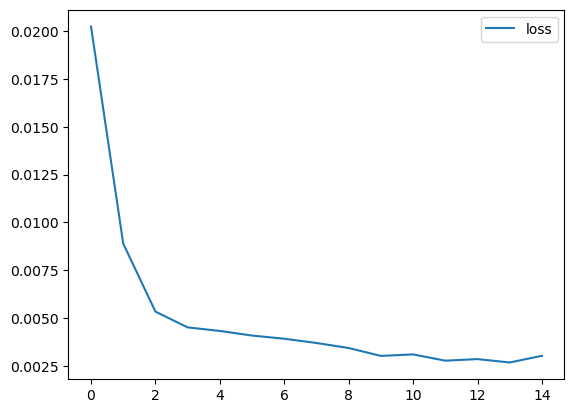

In [62]:
pd.DataFrame(model.history.history).plot()

In [63]:
forecast = []

periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [64]:
forecast = scaler.inverse_transform(forecast)

In [65]:
df[-5:]

,IPN31152N
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


In [66]:
forecast[:5]

array([[116.81761144],
       [121.85684863],
       [124.41282675],
       [121.67491984],
       [114.01237055]])

In [67]:
forecast_index = pd.date_range(start='2019-10-01', periods=periods, freq="MS")

In [68]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [69]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [70]:
forecast_df.head()

,Forecast
2019-10-01,116.817611
2019-11-01,121.856849
2019-12-01,124.412827
2020-01-01,121.674920
2020-02-01,114.012371


<AxesSubplot:xlabel='DATE'>

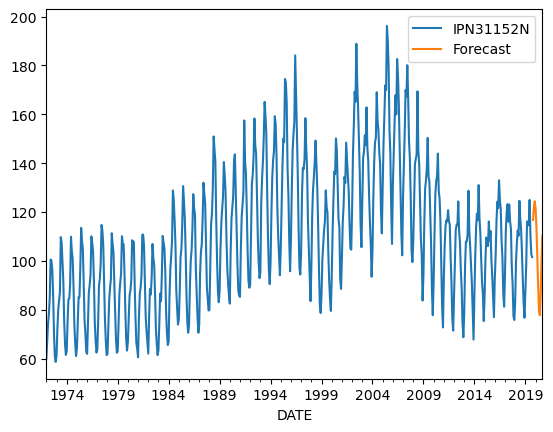

In [71]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 608.0)

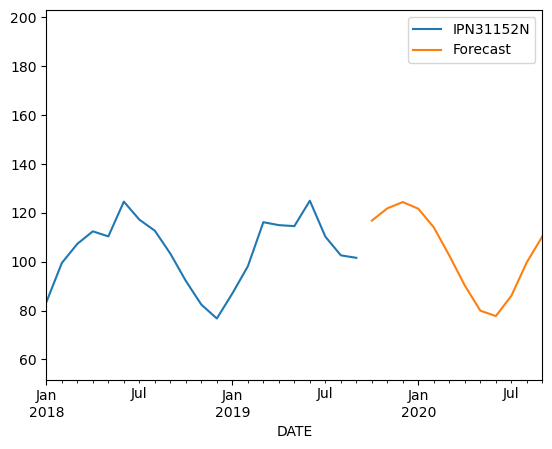

In [74]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-09-01')